In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
from typing import Union

import altair as alt
import numpy as np
import matplotlib.pyplot as plt

get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")

\begin{align}
x &= \log \frac{p}{1 - p}  &\text{Logit} \\
F &= \frac{1}{1 + e^{- x}}  &\text{Logistic function/distribution} \\
f &= \frac{e^{-x}}{(1 + e^{-x})^2} &\text{PDF of logistic distribution}
\end{align}

Note, logistic function is also a valid CDF, so we derive its PDF in the third equation.

In [3]:
def logit(p: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    return np.log(p / (1 - p))


def logistic_cdf(log_odds: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    return 1 / (1 + np.exp(-log_odds))


def logistic_pdf(log_odds: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    return np.exp(-log_odds) / (1 + np.exp(-log_odds)) ** 2

In [4]:
# ps can't hit 0 or 1 to avoid numerical error.
ps = np.linspace(1e-3, 1 - 1e-3, 100)
log_odds = np.linspace(-7, 7, 100)

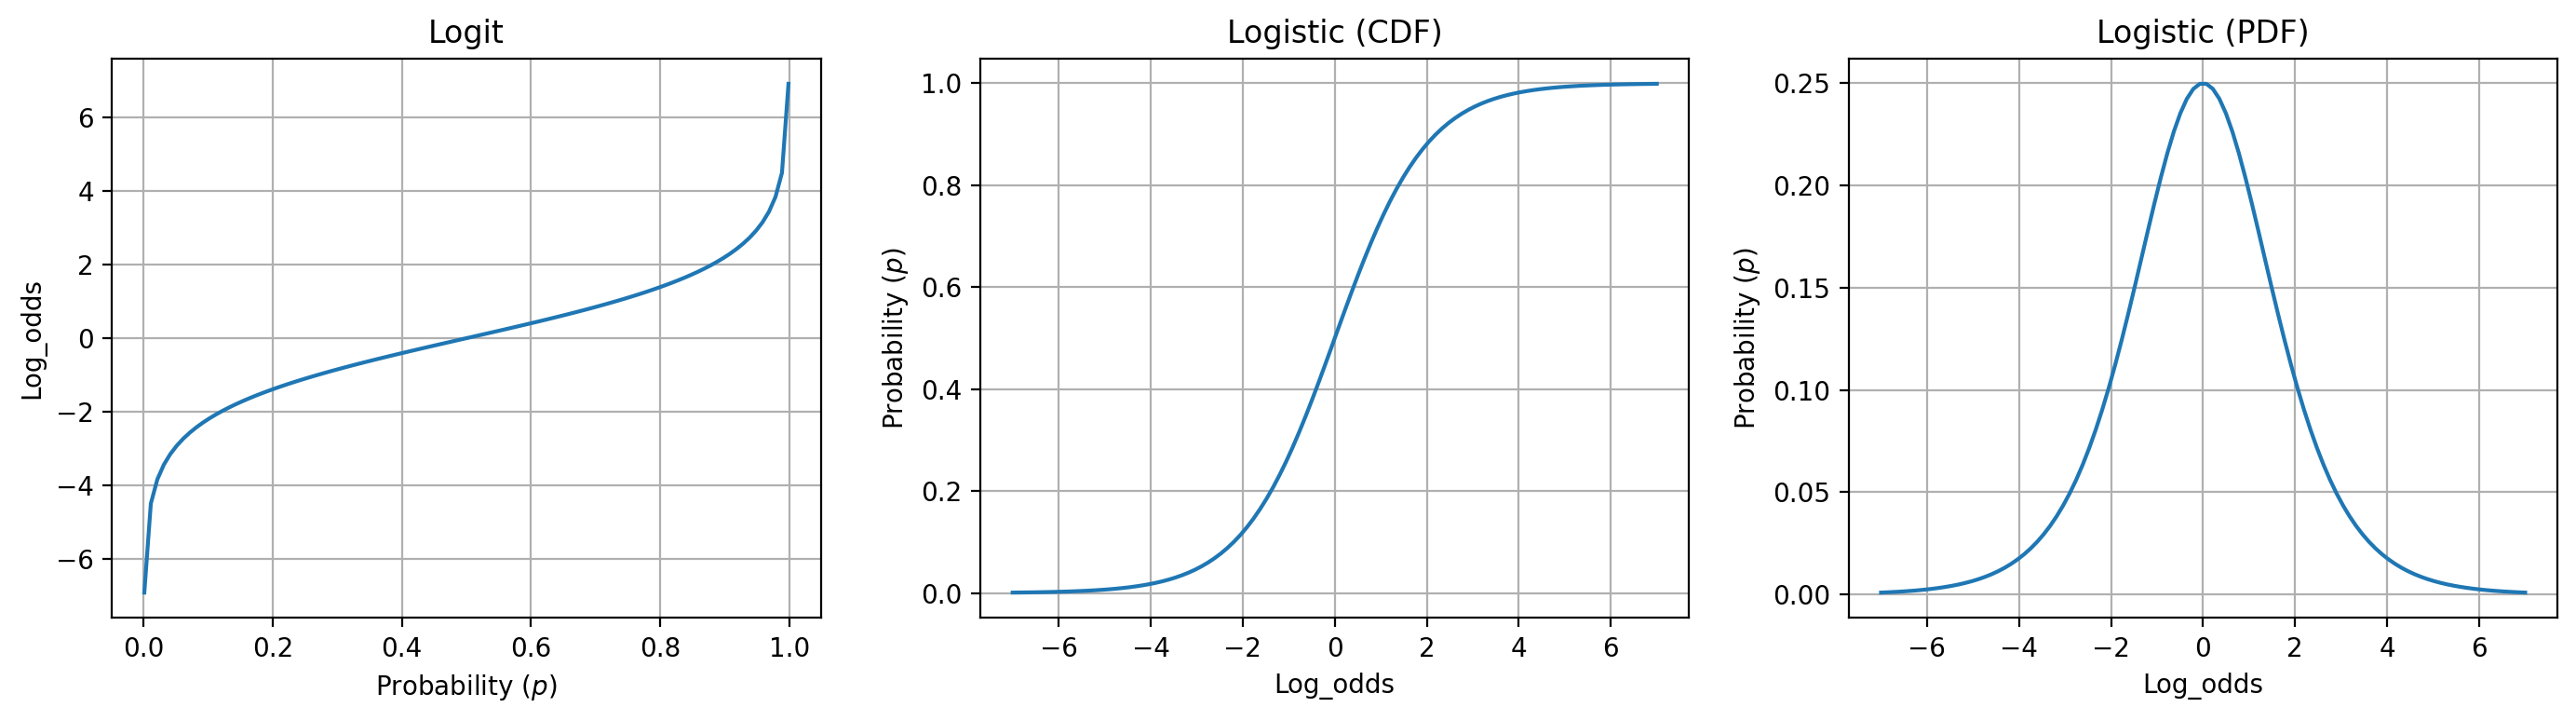

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
ax0, ax1, ax2 = axes.ravel()

ax0.plot(ps, logit(ps), label="Logit")
ax0.set(
    title="Logit",
    xlabel="Probability ($p$)",
    ylabel="Log_odds",
)

ax1.plot(log_odds, logistic_cdf(log_odds))
ax1.set(
    title="Logistic (CDF)",
    xlabel="Log_odds",
    ylabel="Probability ($p$)",
)

ax2.plot(log_odds, logistic_pdf(log_odds))
ax2.set(
    title="Logistic (PDF)",
    xlabel="Log_odds",
    ylabel="Probability ($p$)",
)

for _ax in [ax0, ax1, ax2]:
    _ax.grid()
    
plt.tight_layout()

According to https://en.wikipedia.org/wiki/Logistic_distribution, the variance of the logistic distribution is $\frac{\pi^2}{3} \approx 3.29$. Let's compare the logistic PDF to the normal distribution with the same variance.

In [6]:
def normal_pdf(xs):
    variance = np.pi ** 2 / 3
    return 1 / np.sqrt(2 * np.pi * variance) * np.exp(-0.5 * xs ** 2 / variance)

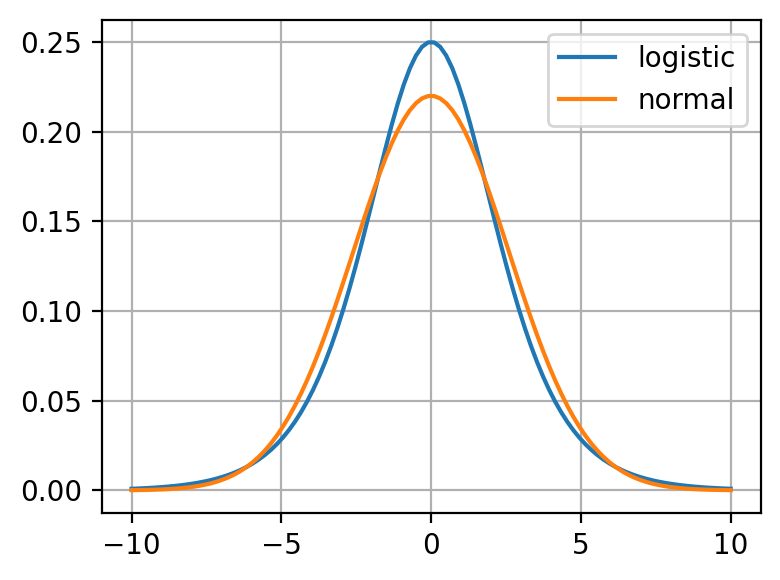

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

xs = np.linspace(-10, 10, 100)
ax.plot(xs, logistic_pdf(log_odds), label='logistic')
ax.plot(xs, normal_pdf(log_odds), label='normal')

ax.legend()
ax.grid()
plt.tight_layout()

So compared to the normal distribution, the logistic distribution is more peaky around the center, but still has a more spread out tail.

In [8]:
# Just plot the same thing is altair. Uncommented if useful.

# log_odds = np.linspace(-10, 10, 100)
# df_plot = pd.concat(
#     [
#         pd.DataFrame({"x": log_odds, "pdf": logistic_pdf(log_odds)}).assign(
#             type="logistic"
#         ),
#         pd.DataFrame({"x": log_odds, "pdf": normal_pdf(log_odds)}).assign(
#             type="normal"
#         ),
#     ]
# )

# alt.Chart(df_plot).mark_line().encode(x='x', y='pdf', color='type').interactive()